# Prophetのチュートリアル
## 参考URL
https://www.slideshare.net/hoxo_m/prophet-facebook-76285278

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

## 2. デフォルト設定で使ってみる

In [10]:
df = pd.read_csv('../resorce/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


### ↓ 3000日分の時系列データ

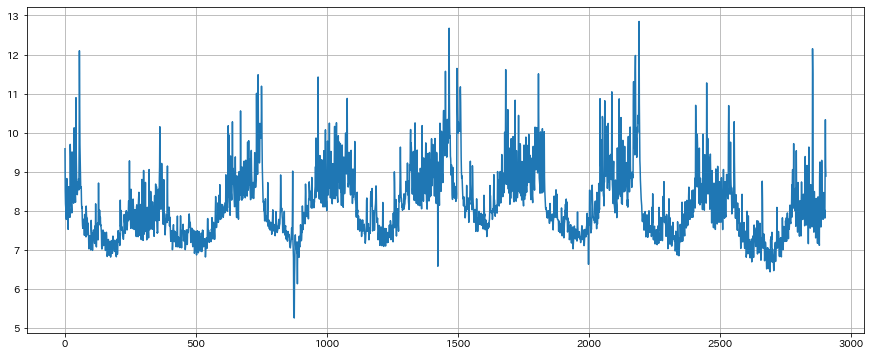

In [12]:
df['y'].plot(figsize=(15, 6), grid=True)

## 予測モデルの生成

In [13]:
from fbprophet import Prophet
model = Prophet()
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
# 365日の空きのデータフレームを作成
future_df = model.make_future_dataframe(365)
future_df.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [16]:
# 予測の作成
forecast_df = model.predict(future_df)
forecast_df[['ds', 'yhat']].tail()

,ds,yhat
3265,2017-01-15,8.206497
3266,2017-01-16,8.531523
3267,2017-01-17,8.318930
3268,2017-01-18,8.151543
3269,2017-01-19,8.163477


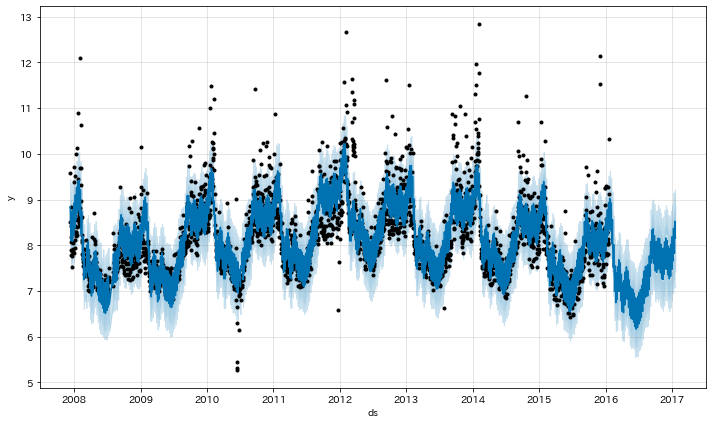

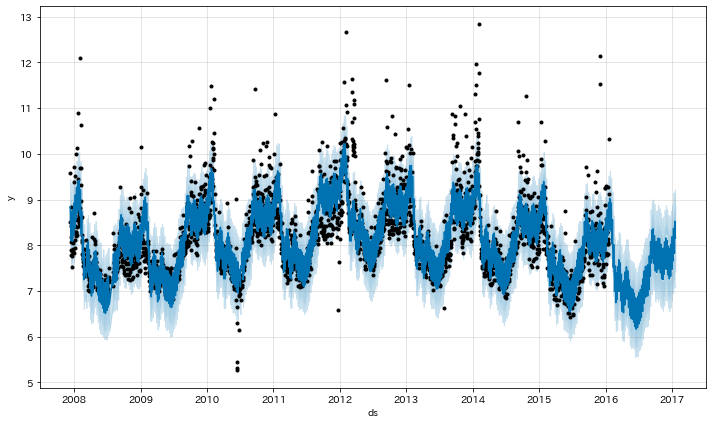

In [22]:
# 予測のプロット（なぜか2つグラフが出力される）
model.plot(forecast_df)

## 3. 業務知識を入れてみる

In [25]:
# 非線型トレンドの指定
model = Prophet(growth='logistic')
df['cap'] = 8.5
model.fit(df)
future_df = model.make_future_dataframe(365*5)
future_df['cap'] = 8.5
forecast_df = model.predict(future_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
# 変化点の指定
model = Prophet(changepoints=['2013-01-31'])
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
# 変化点の数を指定
model = Prophet(n_changepoints=25)
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
# 週周期と年周期の指定
model = Prophet(weekly_seasonality=False,
                yearly_seasonality=True)
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
